In [ ]:
import numpy as np
import scipy.ndimage as nd

input = np.array([
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1],
    [3, 4, 5, 4, 3],
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2]
])

filter = np.array([
    [0, 1, 0],
    [-1, 0, 1],
    [0, -1, 0]
])

convolution_result = nd.convolve(input, filter, mode="constant")
correlation_result = nd.correlate(input, filter, mode="constant")

print("Convolution result: ")
print(convolution_result)
print("Correlation result: ")
print(correlation_result)

Convolution result: 
[[ 3  2  1  0  5]
 [-2  4  4  2  0]
 [-8 -5 -2  1  4]
 [-2 -2 -3 -2  0]
 [-3 -1 -1 -1  1]]
Correlation result: 
[[-3 -2 -1  0 -5]
 [ 2 -4 -4 -2  0]
 [ 8  5  2 -1 -4]
 [ 2  2  3  2  0]
 [ 3  1  1  1 -1]]


In [ ]:
import torch as tc

input = tc.Tensor([
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1],
    [3, 4, 5, 4, 3],
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2]
]).type(tc.float32)

filter = tc.Tensor([
    [0, 1, 0],
    [-1, 0, 1],
    [0, -1, 0]
]).type(tc.float32)

print(f"Input size: {input.size()}")
print(f"Filter sie: {filter.size()}")
input = input.unsqueeze(0).unsqueeze(0) # PyTorch assumes dimension: BxCxYxX (to be discussed later)
filter = filter.unsqueeze(0).unsqueeze(0)  # PyTorch assumes dimension: BxCxYxX (to be discussed later)
print(f"Input size: {input.size()}")
print(f"Filter sie: {filter.size()}")

convolution_result = tc.nn.functional.conv2d(input, filter, padding=1)
print("Convolution result: ")
print(convolution_result)

Input size: torch.Size([5, 5])
Filter sie: torch.Size([3, 3])
Input size: torch.Size([1, 1, 5, 5])
Filter sie: torch.Size([1, 1, 3, 3])
Convolution result: 
tensor([[[[-3., -2., -1.,  0., -5.],
          [ 2., -4., -4., -2.,  0.],
          [ 8.,  5.,  2., -1., -4.],
          [ 2.,  2.,  3.,  2.,  0.],
          [ 3.,  1.,  1.,  1., -1.]]]])


In [ ]:
def our_2d_correlation(input, filter, padding=1):
  result = tc.zeros((input.size(dim=3)+(padding-1)*2,input.size(dim=2)+(padding-1)*2))

  extended_input = tc.zeros((input.size(dim=3)+padding*2,input.size(dim=2)+padding*2))
  extended_input[padding:-(padding),padding:-(padding)] = input

  for x in range(1, extended_input.size(dim=1)-1):
    for y in range(1, extended_input.size(dim=0)-1):
      sub_input = extended_input[y-1:y+2,x-1:x+2]
      result[y-1,x-1] = (sub_input*filter).sum()
  
  return result

In [ ]:
import torch as tc

input = tc.Tensor([
    [1, 2, 3, 4, 5],
    [5, 4, 3, 2, 1],
    [3, 4, 5, 4, 3],
    [1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2]
]).type(tc.float32)

filter = tc.Tensor([
    [0, 1, 0],
    [-1, 0, 1],
    [0, -1, 0]
]).type(tc.float32)

print(f"Input size: {input.size()}")
print(f"Filter sie: {filter.size()}")
input = input.unsqueeze(0).unsqueeze(0) # PyTorch assumes dimension: BxCxYxX (to be discussed later)
filter = filter.unsqueeze(0).unsqueeze(0)  # PyTorch assumes dimension: BxCxYxX (to be discussed later)
print(f"Input size: {input.size()}")
print(f"Filter sie: {filter.size()}")

print("Padding: 1")
pytorch_convolution_result = tc.nn.functional.conv2d(input, filter, padding=1)
our_convolution_result = our_2d_correlation(input, filter, padding=1)
print("PyTorch Convolution result: ")
print(pytorch_convolution_result)
print("Our Convolution result: ")
print(our_convolution_result)
print(f"Difference: {tc.sum(pytorch_convolution_result - our_convolution_result)}")

print("Padding: 2")
pytorch_convolution_result = tc.nn.functional.conv2d(input, filter, padding=2)
our_convolution_result = our_2d_correlation(input, filter, padding=2)
print("PyTorch Convolution result: ")
print(pytorch_convolution_result)
print("Our Convolution result: ")
print(our_convolution_result)
print(f"Difference: {tc.sum(pytorch_convolution_result - our_convolution_result)}")

print("Padding: 3")
pytorch_convolution_result = tc.nn.functional.conv2d(input, filter, padding=2)
our_convolution_result = our_2d_correlation(input, filter, padding=2)
print("PyTorch Convolution result: ")
print(pytorch_convolution_result)
print("Our Convolution result: ")
print(our_convolution_result)
print(f"Difference: {tc.sum(pytorch_convolution_result - our_convolution_result)}")

Input size: torch.Size([5, 5])
Filter sie: torch.Size([3, 3])
Input size: torch.Size([1, 1, 5, 5])
Filter sie: torch.Size([1, 1, 3, 3])
Padding: 1
PyTorch Convolution result: 
tensor([[[[-3., -2., -1.,  0., -5.],
          [ 2., -4., -4., -2.,  0.],
          [ 8.,  5.,  2., -1., -4.],
          [ 2.,  2.,  3.,  2.,  0.],
          [ 3.,  1.,  1.,  1., -1.]]]])
Our Convolution result: 
tensor([[-3., -2., -1.,  0., -5.],
        [ 2., -4., -4., -2.,  0.],
        [ 8.,  5.,  2., -1., -4.],
        [ 2.,  2.,  3.,  2.,  0.],
        [ 3.,  1.,  1.,  1., -1.]])
Difference: 0.0
Padding: 2
PyTorch Convolution result: 
tensor([[[[ 0., -1., -2., -3., -4., -5.,  0.],
          [ 1., -3., -2., -1.,  0., -5., -5.],
          [ 5.,  2., -4., -4., -2.,  0., -1.],
          [ 3.,  8.,  5.,  2., -1., -4., -3.],
          [ 1.,  2.,  2.,  3.,  2.,  0., -1.],
          [ 2.,  3.,  1.,  1.,  1., -1., -2.],
          [ 0.,  2.,  2.,  2.,  2.,  2.,  0.]]]])
Our Convolution result: 
tensor([[ 0., -1., -2.

Image shape: (598, 282, 3)
Image dtype: float32


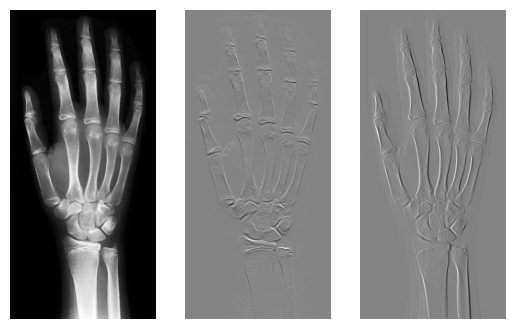

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("xray.jpg")
array = np.array(image).astype(np.float32)
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) # Normalization to [0-1] range
array = normalize(array)
print(f"Image shape: {array.shape}")
print(f"Image dtype: {array.dtype}")

gradient_y_np, gradient_x_np = np.gradient(array[:,:,0])

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(array, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_y_np, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_x_np, cmap='gray')
plt.axis('off')
plt.show()

Tensor shape: torch.Size([598, 282])


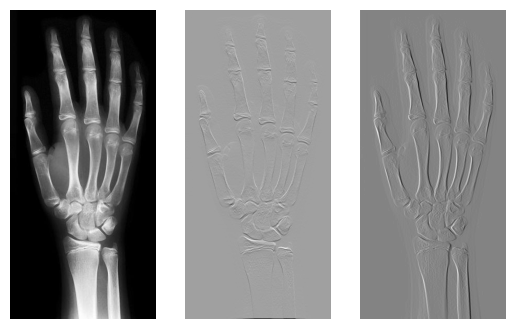

MSE Y: 0.0008247629157267511
MSE X: 0.0013713325606659055


In [ ]:
tensor = tc.from_numpy(array[:,:,0])
print(f"Tensor shape: {tensor.shape}")

### TODO - calculate the Y and X gradient using PyTorch convolution
filter_x = tc.Tensor([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]
]).type(tc.float32)

filter_y = tc.Tensor([
    [0, -1, 0],
    [0, 0, 0],
    [0, 1, 0]
]).type(tc.float32)

tensor = tensor.unsqueeze(0).unsqueeze(0) # PyTorch assumes dimension: BxCxYxX (to be discussed later)
filter_x = filter_x.unsqueeze(0).unsqueeze(0)  # PyTorch assumes dimension: BxCxYxX (to be discussed later)
filter_y = filter_y.unsqueeze(0).unsqueeze(0)  # PyTorch assumes dimension: BxCxYxX (to be discussed later)

gradient_x_tc = tc.nn.functional.conv2d(tensor, filter_x, padding=1)
gradient_y_tc = tc.nn.functional.conv2d(tensor, filter_y, padding=1)

### TODO - show the gradient calculated using PyTorch and calculate the difference between NumPy and PyTorch

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(array, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_y_tc[0, 0, :, :], cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_x_tc[0, 0, :, :], cmap='gray')
plt.axis('off')
plt.show()

mse = lambda a, b: np.mean((a-b)**2)
print(f"MSE Y: {mse(gradient_y_np, gradient_y_tc[0, 0, :, :].numpy())}")
print(f"MSE X: {mse(gradient_x_np, gradient_x_tc[0, 0, :, :].numpy())}")

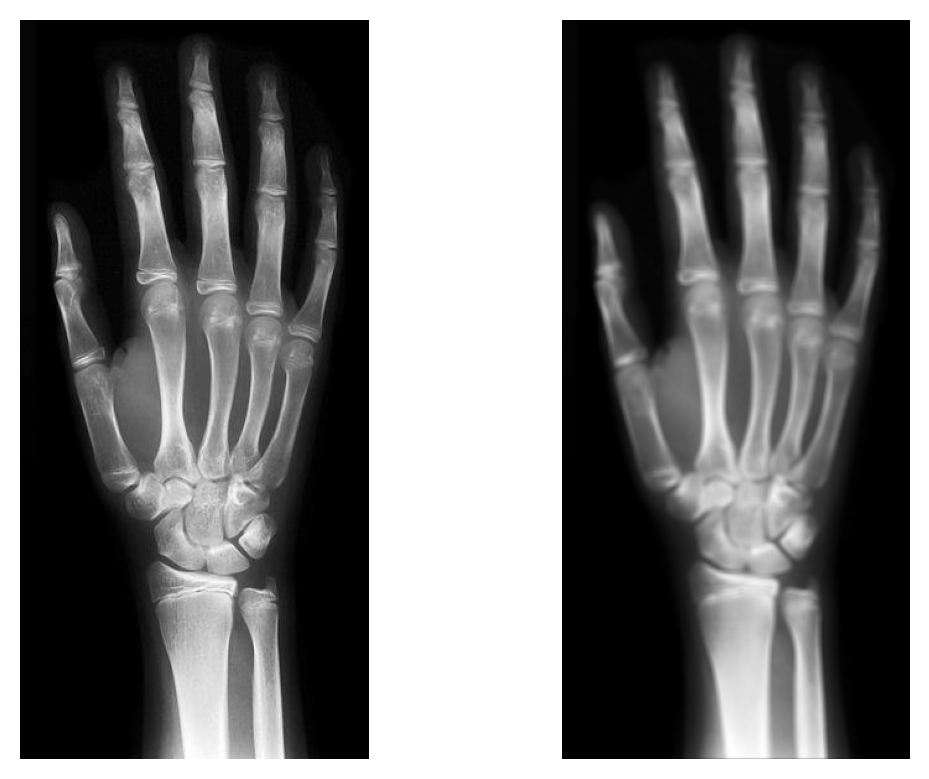

In [ ]:
### TODO - perform uniform filtering (5, 5) of the input image using PyTorch convolution

filter = tc.Tensor([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
]).type(tc.float32)

filter = filter.unsqueeze(0).unsqueeze(0)  # PyTorch assumes dimension: BxCxYxX (to be discussed later)

smoothed_tensor = tc.nn.functional.conv2d(tensor, filter, padding=1)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(tensor[0, 0, :, :], cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(smoothed_tensor[0, 0, :, :], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
filter_np = filter[0,:].numpy()
print("Timing NumPy: ")
%timeit convolution_result = nd.convolve(array, filter_np, mode="constant")
print("Timing PyTorch: ")
%timeit tc.nn.functional.conv2d(tensor, filter, padding=1)

Timing NumPy: 
16.4 ms ± 2.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timing PyTorch: 
2.29 ms ± 82.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
filter_np = filter[0,:].numpy()
print("Timing NumPy: ")
%timeit convolution_result = nd.convolve(array, filter_np, mode="constant")
print("Timing PyTorch: ")
%timeit tc.nn.functional.conv2d(tensor, filter, padding=1).to("cuda:0")

Timing NumPy: 
16.3 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Timing PyTorch: 
3.39 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
speed_up = 16.3e-3 / 3.39e-3
print(f"Speed-up: {speed_up}")

Speed-up: 4.808259587020649


In [ ]:
device = "cuda" if tc.cuda.is_available() else "cpu"
print(f"Using {device} device")

class SimpleNeuralNetwork(tc.nn.Module):
    def __init__(self):
      super().__init__()
      self.linear_relu_stack = tc.nn.Sequential(
        tc.nn.Linear(128, 128),
        tc.nn.ReLU(),
        tc.nn.Linear(128, 64),
        tc.nn.ReLU(),
        tc.nn.Linear(64, 2),
        tc.nn.Sigmoid(),
      )
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

from torchsummary import summary

network = SimpleNeuralNetwork()

random_input = tc.randn((4, 128))
random_output = network(random_input)

print(f"Size of the random input: {random_input.size()}")
print(f"Size of the random output: {random_output.size()}")
print("Random output: ")
print(random_output)

print("Network summary: ")
summary(network.to(device), (4, 128))

Using cuda device
Size of the random input: torch.Size([4, 128])
Size of the random output: torch.Size([4, 2])
Random output: 
tensor([[0.5397, 0.5176],
        [0.5306, 0.5012],
        [0.4782, 0.5410],
        [0.5090, 0.4941]], grad_fn=<SigmoidBackward0>)
Network summary: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 4, 128]          16,512
              ReLU-2               [-1, 4, 128]               0
            Linear-3                [-1, 4, 64]           8,256
              ReLU-4                [-1, 4, 64]               0
            Linear-5                 [-1, 4, 2]             130
           Sigmoid-6                 [-1, 4, 2]               0
Total params: 24,898
Trainable params: 24,898
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (M

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class SimpleConvolutionalNeuralNetwork(tc.nn.Module):
    def __init__(self):
      super().__init__()
      self.linear_relu_stack = tc.nn.Sequential(
        tc.nn.Conv2d(3,32,3,1,1),
        tc.nn.ReLU(),
        tc.nn.Conv2d(32,64,3,2,2),
        tc.nn.ReLU(),
        tc.nn.Conv2d(64,128,3,1,1),
        tc.nn.ReLU(),
        tc.nn.Conv2d(128,128,3,2,2),
        tc.nn.ReLU(),
        tc.nn.AdaptiveAvgPool2d(128),
      )
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

convolutional_network = SimpleConvolutionalNeuralNetwork()

random_input = tc.randn((4, 3, 224, 224))
random_output = convolutional_network(random_input)

print(f"Size of the random input: {random_input.size()}")
print(f"Size of the random output: {random_output.size()}")
print("Random output: ")
print(random_output)

print("Network summary: ")
summary(convolutional_network.to(device), (3, 224, 224))

Size of the random input: torch.Size([4, 3, 224, 224])
Size of the random output: torch.Size([4, 128, 128, 128])
Random output: 
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0009, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0009, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0004, 0.0000, 0.0000],
          ...,
          [0.0010, 0.0010, 0.0005,  ..., 0.0000, 0.0000, 0.0000],
          [0.0019, 0.0019, 0.0010,  ..., 0.0000, 0.0000, 0.0000],
          [0.0019, 0.0019, 0.0010,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0299, 0.0299, 0.0213,  ..., 0.0187, 0.0278, 0.0278],
          [0.0299, 0.0299, 0.0213,  ..., 0.0187, 0.0278, 0.0278],
          [0.0338, 0.0338, 0.0331,  ..., 0.0360, 0.0281, 0.0281],
          ...,
          [0.0420, 0.0420, 0.0462,  ..., 0.0394, 0.0369, 0.0369],
          [0.0368, 0.0368, 0.0363,  ..., 0.0324, 0.0218, 0.0218],
          [0.0368, 0.0368, 0.0363,  ..., 0.0324, 0.0218, 0.0218]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.00

In [ ]:
class ClassificationNeuralNetwork(tc.nn.Module):
    def __init__(self):
      super().__init__()
      self.linear_relu_stack = tc.nn.Sequential(
        SimpleConvolutionalNeuralNetwork(),
        tc.nn.Linear(128, 128),
      )
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

classification_network = ClassificationNeuralNetwork()

random_input = tc.randn((4, 3, 224, 224))
random_output = classification_network(random_input)

print(f"Size of the random input: {random_input.size()}")
print(f"Size of the random output: {random_output.size()}")
print("Random output: ")
print(random_output)

print("Network summary: ")
summary(classification_network.to(device), (3, 224, 224))

Size of the random input: torch.Size([4, 3, 224, 224])
Size of the random output: torch.Size([4, 128, 128, 128])
Random output: 
tensor([[[[ 0.0541, -0.0458, -0.0398,  ..., -0.0235,  0.0441, -0.0615],
          [ 0.0541, -0.0458, -0.0398,  ..., -0.0235,  0.0441, -0.0615],
          [ 0.0522, -0.0432, -0.0368,  ..., -0.0202,  0.0383, -0.0704],
          ...,
          [ 0.0552, -0.0425, -0.0387,  ..., -0.0135,  0.0346, -0.0637],
          [ 0.0545, -0.0449, -0.0403,  ..., -0.0230,  0.0443, -0.0618],
          [ 0.0545, -0.0449, -0.0403,  ..., -0.0230,  0.0443, -0.0618]],

         [[ 0.0579, -0.0247, -0.0267,  ..., -0.0076,  0.0286, -0.0813],
          [ 0.0579, -0.0247, -0.0267,  ..., -0.0076,  0.0286, -0.0813],
          [ 0.0573, -0.0354, -0.0247,  ..., -0.0086,  0.0229, -0.0795],
          ...,
          [ 0.0540, -0.0354, -0.0281,  ..., -0.0101,  0.0150, -0.0796],
          [ 0.0562, -0.0288, -0.0185,  ..., -0.0075,  0.0092, -0.0868],
          [ 0.0562, -0.0288, -0.0185,  ..., -0.